<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Structured_Dataset/blob/main/Intro_Regression__dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A larger example
* we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.
 
https://www.kaggle.com/mirichoi0218/insurance Medical Cost dataset available from Kaggle and hosted on GitHub.


In [ ]:
# mounting the google drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing tensorflow ,pandas,numpy,matplotlib
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# importing the file the dataset file:
data=pd.read_csv("/content/drive/MyDrive/tensorflow_folder/insurance.csv")

In [ ]:
data.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [ ]:
#checking data type and null values in the dataframe.
data.dtypes, data.isna().sum()

(age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object, age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64)

In [ ]:
# inserting and replacing the values of the data["sex"] with male as 0 and female as 1.
data["sex"] = data["sex"].map({'male':0 , 'female':1})


In [ ]:
data["smoker"]=data["smoker"].map({"yes":1,"no":0})

In [ ]:
data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061


In [ ]:
#onehot encoder function:
insurance_data=pd.get_dummies(data)
insurance_data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [ ]:
#Creating the train dat and test data set
#x=tf.constant(insurance_data.drop("charges", axis=1))
#y= tf.constant(tf.reshape(insurance_data['charges'],[1338,1]))

In [ ]:
#Creating the train dat and test data set
x=insurance_data.drop("charges", axis=1)
y= insurance_data['charges']

In [ ]:
x.shape,y.shape

((1338, 9), (1338,))

In [ ]:
#create train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=21)


In [ ]:
# building the model:

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100),
                           tf.keras.layers.Dense(1)])

# Compiling the model:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


In [ ]:
#fitting the model:
history=model.fit(x_train,y_train,epochs=200)


Epoch 1/200
34/34 [==============================] - 2s 2ms/step - loss: 13027.5869 - mae: 13027.5869
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12970.5537 - mae: 12970.5537
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12892.7432 - mae: 12892.7432
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12784.3271 - mae: 12784.3271
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12638.7852 - mae: 12638.7852
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 12452.0273 - mae: 12452.0273
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12220.5225 - mae: 12220.5225
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 11943.1084 - mae: 11943.1084
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 11619.5410 - mae: 11619.5410
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11253.86

In [ ]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6828.2744 - mae: 6828.2744


[6828.2744140625, 6828.2744140625]

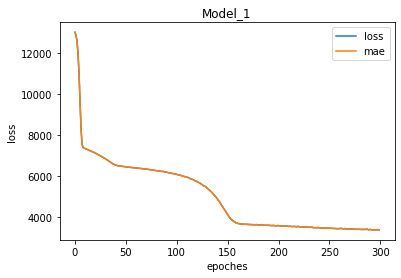

In [ ]:
#history plot is for plotting the loss curve or training curve:
def model_1():
    pd.DataFrame(history.history).plot()
    plt.ylabel('loss')
    plt.xlabel("epoches")
    plt.title("Model_1")
model_1()

In [ ]:
# building another model:
tf.random.set_seed=42
model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1) ])
# compiling the model:

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# fitting the model

history_1=model2.fit(x_train,y_train,epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 12982.9307 - mae: 12982.9307
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 12774.9883 - mae: 12774.9883
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 12359.6650 - mae: 12359.6650
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 11585.6973 - mae: 11585.6973
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 10369.9102 - mae: 10369.9102
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 8977.3203 - mae: 8977.3203
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 7886.9756 - mae: 7886.9756
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 7449.7144 - mae: 7449.7144
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 7380.2402 - mae: 7380.2402
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7357.3716 - mae:

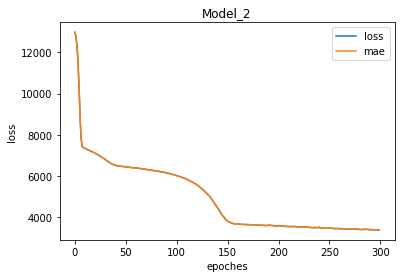

In [ ]:
#history plot is for plotting the loss curve or training curve:
def model_2():
    pd.DataFrame(history_1.history).plot()
    plt.ylabel('loss')
    plt.xlabel("epoches")
    plt.title("Model_2")
model_2()

In [ ]:
model2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3630.1086 - mae: 3630.1086


[3630.108642578125, 3630.108642578125]

#Again Creating the model:

In [ ]:
## preprocessing: importing Class functions
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [ ]:
# importing the file the dataset file:
ins=pd.read_csv("/content/drive/MyDrive/tensorflow_folder/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
## preprocessing the data:
ct= make_column_transformer(
                             (MinMaxScaler(),['age','bmi','children']),
                              (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
                                                                                                               )


In [ ]:
##spliting the data:
x1= ins.drop("charges",axis=1)
y1=ins['charges']

In [ ]:
## creating the training data and test data:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20)

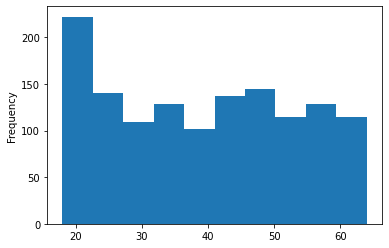

In [ ]:
x['age'].plot(kind='hist');

In [ ]:
## fitting training data into col_transformer
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
## transform training data and test data with normalization (MinMaxScalar) and OneHotEncoder
x_train_normal=ct.transform(x_train)

In [ ]:
## transform training data and test data with normalization (MinMaxScalar) and OneHotEncoder

x_test_normal=ct.transform(x_test)

In [ ]:
## building the network

model4= tf.keras.Sequential([ tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(1)                            
])

# model Compiling:

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])
#
history_2=model4.fit(x_train_normal,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 12872.0186 - mae: 12872.0186
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 8617.4873 - mae: 8617.4873
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7267.7188 - mae: 7267.7188
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 5595.3979 - mae: 5595.3979
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3887.3682 - mae: 3887.3682
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3498.8452 - mae: 3498.8452
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3342.8911 - mae: 3342.8911
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3276.9016 - mae: 3276.9016
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3257.0112 - mae: 3257.0112
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3267.6250 - mae: 3267.62

In [ ]:
##evaluating the model

model4.evaluate(x_test_normal,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 1948.3265 - mae: 1948.3265


[1948.3265380859375, 1948.3265380859375]

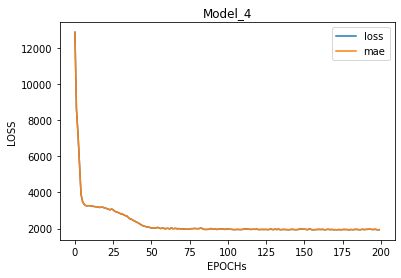

In [ ]:
def model_4():
    pd.DataFrame(history_2.history).plot()
    plt.xlabel("EPOCHs")
    plt.ylabel("LOSS");
    plt.title('Model_4')
model_4()

In [ ]:
## building the network activation=softmax

model3= tf.keras.Sequential([ tf.keras.layers.Dense(100,activation="softmax"),
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(1)                            
])

# model Compiling:

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])
#
history_graph=model3.fit(x_train_normal,y_train,epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 13452.4648 - mae: 13452.4648
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13373.5820 - mae: 13373.5820
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13175.0098 - mae: 13175.0098
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 12822.6211 - mae: 12822.6211
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 12311.9238 - mae: 12311.9238
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 11688.7178 - mae: 11688.7178
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 11085.3262 - mae: 11085.3262
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 10535.8877 - mae: 10535.8877
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 10035.1289 - mae: 10035.1289
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 9607.667

In [ ]:
model3.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1890.9861 - mae: 1890.9861


[1890.986083984375, 1890.986083984375]

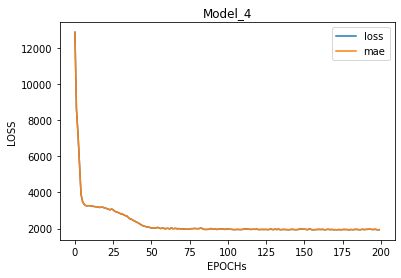

In [ ]:
def model_3():
    pd.DataFrame(history_2.history).plot()
    plt.xlabel("EPOCHs")
    plt.ylabel("LOSS");
    plt.title('Model_4')
model_3()

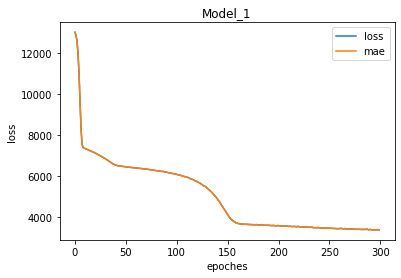

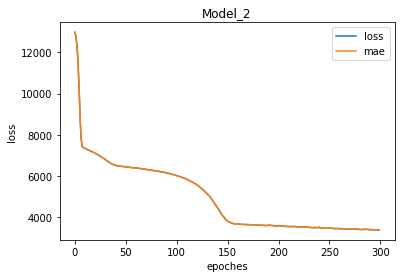

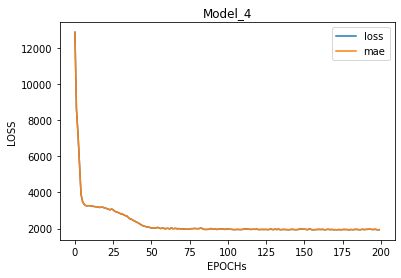

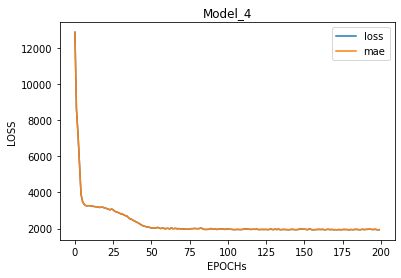

In [ ]:
### comparision of all model graphs:
def Model_graph_comparison():
    model_1()
    model_2()
    model_3()
    model_4()
Model_graph_comparison()